<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana8/NewtonGeneralizado2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
G = (lambda x,y: x**2 - y**2 + 1, \
     lambda x,y: 2*x*y)

In [6]:
def GetVectorF(G,r):

    v = np.zeros(len(G))
    for i in range(v.shape[0]):
        v[i] = G[i](r[0],r[1])

    return v

In [7]:
GetVectorF(G,np.array([0.,0.]))

array([1., 0.])

In [21]:
def GetJacobian(G,r,h=1e-4):

    J = np.zeros((r.shape[0],r.shape[0]))

    for i in range(r.shape[0]):
        J[i,0] = (G[i](r[0]+h,r[1]) - G[i](r[0]-h,r[1]))/(2*h)
        J[i,1] = (G[i](r[0],r[1]+h) - G[i](r[0],r[1]-h))/(2*h)


    return J # alejandro cuenta luego porque!!

In [22]:
GetJacobian(G,np.array([1.,0.]))

array([[2., 0.],
       [0., 2.]])

In [28]:
def NewtonRaphson(G,r, itmax = 100, tolerancia = 1e-10):

  it = 0
  d = 1.
  Distance = np.array([])

  while  it < itmax and d  > tolerancia:

    F = GetVectorF(G,r)
    J = GetJacobian(G,r)
    #print(J)
    InvJ = np.linalg.inv(J)
    #print(InvJ)

    r_new = r - np.dot(InvJ,F)

    diff = r_new - r
    #print(diff)
    d = np.linalg.norm(diff)
    #print(d)
    Distance = np.append(Distance,d)

    if it%50 == 0:
      print(it,d)

    r = r_new
    it += 1

  return r,Distance


In [29]:
r0 = np.array([0.5,1.7])
r,Distance = NewtonRaphson(G,r0)
r

0 0.6665100665332339


array([0., 1.])

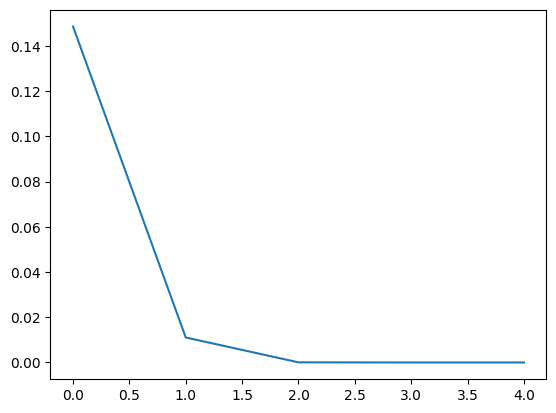

In [25]:
plt.plot(Distance)